
**Objective:**
The objective of this challenge is to build a machine learning model that helps predict the location and extent of floods in southern Malawi.


**Evaluation:**
RMSE

**Submission:**
For every row in the dataset, submission files should contain 2 columns: Square_ID and target_2019.



In [3]:
#load libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import StandardScaler  
from scipy import sparse
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
from math import sqrt
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
import random
import dython
from dython import nominal

In [15]:
#load data
train = pd.read_csv("Train.csv")
submission = pd.read_csv("SampleSubmission.csv")

In [16]:
train.head()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode,Square_ID
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41
4,34.26,-15.87,0.0,437.443428,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,0.896323,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41


In [17]:
submission.head()

,Square_ID,target_2019
0,4e3c3896-14ce-11ea-bce5-f49634744a41,0.109
1,4e3c3897-14ce-11ea-bce5-f49634744a41,0.504
2,4e3c3898-14ce-11ea-bce5-f49634744a41,0.021
3,4e3c3899-14ce-11ea-bce5-f49634744a41,0.827
4,4e3c389a-14ce-11ea-bce5-f49634744a41,0.786


In [18]:
#summary
train.describe()

,X,Y,target_2015,elevation,precip 2014-11-16 - 2014-11-23,precip 2014-11-23 - 2014-11-30,precip 2014-11-30 - 2014-12-07,precip 2014-12-07 - 2014-12-14,precip 2014-12-14 - 2014-12-21,precip 2014-12-21 - 2014-12-28,...,precip 2019-03-17 - 2019-03-24,precip 2019-03-24 - 2019-03-31,precip 2019-03-31 - 2019-04-07,precip 2019-04-07 - 2019-04-14,precip 2019-04-14 - 2019-04-21,precip 2019-04-21 - 2019-04-28,precip 2019-04-28 - 2019-05-05,precip 2019-05-05 - 2019-05-12,precip 2019-05-12 - 2019-05-19,LC_Type1_mode
count,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,...,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.00000
mean,35.077656,-15.813802,0.076609,592.848206,1.610760,2.502058,1.162076,8.270610,8.892459,9.572821,...,35.637354,2.126234,3.453395,3.559366,9.127677,1.660709,0.526144,0.968101,1.585743,10.73175
std,0.392395,0.359789,0.228734,354.790357,4.225461,8.631846,4.396676,4.263375,3.760052,4.523767,...,14.519169,3.734829,8.007248,3.820294,6.868937,4.418032,1.494935,3.690698,4.651863,2.02610
min,34.260000,-16.640000,0.000000,45.541444,0.000000,0.000000,0.000000,1.411452,3.580342,1.254098,...,15.803429,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000
25%,34.760000,-16.070000,0.000000,329.063852,0.000000,0.000000,0.000000,5.548440,5.905440,6.179885,...,22.021763,0.000000,0.000000,0.000000,4.352528,0.000000,0.000000,0.000000,0.000000,9.00000
50%,35.050000,-15.800000,0.000000,623.000000,0.000000,0.000000,0.000000,7.941822,8.618390,8.786780,...,34.275716,0.896323,0.000000,2.607053,7.862453,0.000000,0.000000,0.000000,0.000000,10.00000
75%,35.390000,-15.520000,0.000000,751.434813,1.261848,0.000000,0.000000,10.887235,10.960668,12.670775,...,44.253897,2.076590,2.914996,6.390000,13.459070,0.000000,0.000000,0.000000,0.000000,12.00000
max,35.860000,-15.210000,1.000000,2803.303645,19.354969,41.023858,22.020803,18.870675,23.044340,21.757828,...,72.123185,16.403638,37.059980,12.979454,46.367849,19.475846,6.914834,18.170051,20.092777,17.00000


In [19]:
#check for missing data
train.isnull().sum()

X                                 0
Y                                 0
target_2015                       0
elevation                         0
precip 2014-11-16 - 2014-11-23    0
precip 2014-11-23 - 2014-11-30    0
precip 2014-11-30 - 2014-12-07    0
precip 2014-12-07 - 2014-12-14    0
precip 2014-12-14 - 2014-12-21    0
precip 2014-12-21 - 2014-12-28    0
precip 2014-12-28 - 2015-01-04    0
precip 2015-01-04 - 2015-01-11    0
precip 2015-01-11 - 2015-01-18    0
precip 2015-01-18 - 2015-01-25    0
precip 2015-01-25 - 2015-02-01    0
precip 2015-02-01 - 2015-02-08    0
precip 2015-02-08 - 2015-02-15    0
precip 2015-02-15 - 2015-02-22    0
precip 2015-02-22 - 2015-03-01    0
precip 2015-03-01 - 2015-03-08    0
precip 2015-03-08 - 2015-03-15    0
precip 2019-01-20 - 2019-01-27    0
precip 2019-01-27 - 2019-02-03    0
precip 2019-02-03 - 2019-02-10    0
precip 2019-02-10 - 2019-02-17    0
precip 2019-02-17 - 2019-02-24    0
precip 2019-02-24 - 2019-03-03    0
precip 2019-03-03 - 2019-03-

In [21]:
train2 = pd.read_csv("Train2.csv")

In [22]:
train_cluster = train[['Square_ID','X','Y']]

In [23]:
train_x_y = train[['X','Y']]

In [24]:
#find optimial number of clusters
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import StandardScaler 

ss = StandardScaler()
ss.fit(train_x_y)
data_transformed = ss.transform(train_x_y)

In [25]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

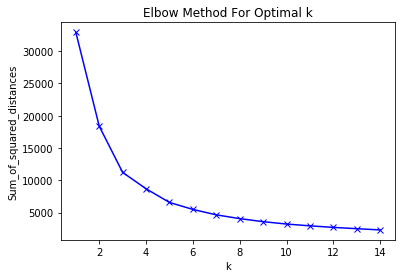

In [26]:
#find optimal cluster
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [27]:
#generate clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(data_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [28]:
labels = kmeans.predict(data_transformed)
centroids = kmeans.cluster_centers_

In [29]:
#convert labels and centroids to pd
labels_df = pd.Series(labels)
#centroids_df = pd.Series(centroids)

In [30]:
labels_df.columns = ['Cluster']

In [31]:
labels_df.head()

0    1
1    1
2    1
3    1
4    1
dtype: int32

In [32]:
train_combine2 = pd.concat([train2, labels_df],axis = 1)

In [81]:
train_combine2.head()

,X,Y,target_2015,elevation,WEEK_1_2015,WEEK_2_2015,WEEK_3_2015,WEEK_4_2015,WEEK_5_2015,WEEK_6_2015,...,WEEK_11_2019,WEEK_12_2019,WEEK_13_2019,WEEK_14_2019,WEEK_15_2019,WEEK_16_2019,WEEK_17_2019,LC_Type1_mode,Square_ID,0
0,34.26,-15.91,0.0,887.764222,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3896-14ce-11ea-bce5-f49634744a41,1
1,34.26,-15.90,0.0,743.403912,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3897-14ce-11ea-bce5-f49634744a41,1
2,34.26,-15.89,0.0,565.728343,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.68,0.0,0.0,0.0,0.0,0.0,0.0,9,4e3c3898-14ce-11ea-bce5-f49634744a41,1
3,34.26,-15.88,0.0,443.392774,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c3899-14ce-11ea-bce5-f49634744a41,1
4,34.26,-15.87,0.0,437.443429,0.0,0.0,0.0,14.844025,14.552823,12.237766,...,1.68,0.0,0.0,0.0,0.0,0.0,0.0,10,4e3c389a-14ce-11ea-bce5-f49634744a41,1


In [82]:
train_df = train_combine2[['Square_ID','LC_Type1_mode','X','Y','elevation',
 'WEEK_1_2015','WEEK_2_2015',
 'WEEK_3_2015','WEEK_4_2015',
 'WEEK_5_2015',
 'WEEK_6_2015',
 'WEEK_7_2015',
 'WEEK_8_2015',
 'WEEK_9_2015',
 'WEEK_10_2015','WEEK_11_2015',
 'WEEK_12_2015','WEEK_13_2015','WEEK_14_2015', 'WEEK_15_2015', 'WEEK_16_2015','WEEK_17_2015',
'target_2015']]

In [83]:
test_df = train_combine2[['Square_ID','LC_Type1_mode','X','Y','elevation','WEEK_1_2019',
 'WEEK_2_2019',
 'WEEK_3_2019',
 'WEEK_4_2019',
 'WEEK_5_2019',
 'WEEK_6_2019',
 'WEEK_7_2019',
 'WEEK_8_2019',
 'WEEK_9_2019',
 'WEEK_10_2019',
 'WEEK_11_2019',
 'WEEK_12_2019',
 'WEEK_13_2019',
 'WEEK_14_2019',
 'WEEK_15_2019',
 'WEEK_16_2019',
 'WEEK_17_2019']]

In [84]:
train_df.columns = ['Square_ID','LC_Type1_mode','X','Y','elevation','WEEK_1','WEEK_2',
 'WEEK_3','WEEK_4','WEEK_5','WEEK_6','WEEK_7','WEEK_8','WEEK_9','WEEK_10','WEEK_11','WEEK_12','WEEK_13',
'WEEK_14','WEEK_15','WEEK_16','WEEK_17','target']

In [85]:
test_df.columns = ['Square_ID','LC_Type1_mode','X','Y','elevation','WEEK_1','WEEK_2',
 'WEEK_3','WEEK_4','WEEK_5','WEEK_6','WEEK_7','WEEK_8','WEEK_9','WEEK_10','WEEK_11','WEEK_12','WEEK_13',
 'WEEK_14','WEEK_15','WEEK_16','WEEK_17']

In [86]:
#load modelling data
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import StandardScaler  
from scipy import sparse
from catboost import CatBoostClassifier, Pool
import lightgbm as lgb
import xgboost as xgb
from math import sqrt
from sklearn.metrics import mean_squared_error
from scipy.stats import uniform, randint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, GridSearchCV, RandomizedSearchCV
import random
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix, recall_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from catboost import CatBoostRegressor

In [87]:
# Creating a list of regressor algorithms to compare with
#
models = [RandomForestRegressor(), GradientBoostingRegressor(), AdaBoostRegressor(), DecisionTreeRegressor(),  XGBRegressor(objective ='reg:squarederror'),\
          SVR(), KNeighborsRegressor(), LinearRegression(), CatBoostRegressor(logging_level='Silent')]


# Creating lists of the algorithms, to store the accuracy scores of each fold
#
RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVR, KNeighbors, Linear, Cat = ([] for x in range(9))


# Creating a list containig the list of each algorithm. Created for easy iteration
#
model_list = [RandomForest, GradientBoosting, AdaBoost, DecisionTree, XGB, SVR, KNeighbors, Linear, Cat]

In [88]:
# Spliting the data into features and the target variable
#
X = train_df.drop(['Square_ID','target'], axis = 1)
y = train_df.target

In [89]:
# Creating a cross validation of 10 folds
#
kfold  = KFold(n_splits=10, random_state=101)


In [90]:
# Iterating through each model and appending the scores of each fold to the appriopriate list
#
for i, j in zip(models, model_list):
  j.extend(list(cross_val_score(i, X, y, scoring = 'neg_mean_squared_error', cv = kfold)))

  
# Creating a function to convert neg_mean_squared_error to a square root
#
def sq(lis):
  new_lis = []
  lis = np.array(lis)
  for i in lis:
    i = np.sqrt(i*-1)
    new_lis.append(i)
  return new_lis

In [91]:
# Creating a dataframe of all the rmses from the iterations for each model
#
rmses = pd.DataFrame({'Fold': np.arange(1, 11), 'RandomForest': sq(RandomForest), 'GradientBoosting': sq(GradientBoosting), 'Adaboost': sq(AdaBoost), 'DecisionTree': sq(DecisionTree),\
                       'XGB': sq(XGB), 'SVR': sq(SVR), 'Kneighbors': sq(KNeighbors), 'Linear': sq(Linear), 'Cat': sq(Cat)})

In [92]:
# Setting the index
#
rmses.set_index('Fold', inplace = True)

In [93]:
# Calculating the mean and standard deviation rmse of each algorithm
#
rmses.loc['mean'] = rmses.mean()
rmses.loc['std'] = rmses.std()


# Previewing the rmses dataframe
#
rmses

,RandomForest,GradientBoosting,Adaboost,DecisionTree,XGB,SVR,Kneighbors,Linear,Cat
Fold,,,,,,,,,
1,0.086036,0.083917,0.091277,0.085926,0.085266,0.130030,0.086023,0.135525,0.084736
2,0.060447,0.059387,0.070836,0.090532,0.058436,0.109588,0.058385,0.089754,0.065182
3,0.114516,0.089913,0.156233,0.154869,0.088311,0.127571,0.096783,0.121761,0.097129
4,0.155059,0.166018,0.212118,0.199595,0.170162,0.198237,0.191840,0.262740,0.157124
5,0.181842,0.179427,0.197332,0.215803,0.176187,0.206946,0.177272,0.336841,0.159144
6,0.113468,0.118684,0.220412,0.134948,0.118987,0.148899,0.109368,0.231556,0.109492
7,0.054890,0.056948,0.141379,0.071294,0.058730,0.112574,0.059242,0.153379,0.053454
8,0.142600,0.102227,0.125141,0.174559,0.101140,0.195758,0.184638,0.115595,0.148803
9,0.253364,0.264469,0.291658,0.277541,0.260912,0.276724,0.324014,0.341167,0.261529


In [94]:
# Checking for the regressor with minimum root mean squared error
#
rmses.loc['mean'].idxmin(), rmses.loc['mean'].min()

('XGB', 0.13455272123922016)

In [95]:
# Arranging the models in ascending order
#
rmses.loc['mean'].sort_values()

XGB                 0.134553
GradientBoosting    0.134649
Cat                 0.135089
RandomForest        0.139335
Kneighbors          0.151803
DecisionTree        0.171933
SVR                 0.174292
Adaboost            0.186986
Linear              0.215898
Name: mean, dtype: float64

In [96]:
# Using the top three models; XGBoost, Catboost and Gradientboost to train and make predictions
# Creating a list of models to use
models = [XGBRegressor(objective ='reg:squarederror'), CatBoostRegressor(logging_level='Silent'), GradientBoostingRegressor()]
model_names = ['xgboost', 'catboost', 'gradientboost']


# Selecting the training features and the target feature
#
X = train_df.drop(['Square_ID','target'], axis = 1)
y = train_df.target


# Submission dataset
#
sub = test_df.drop('Square_ID', axis = 1)


# Using a for loop to create a submission file for each model
#
for model, model_name in zip(models, model_names):
  regressor = model                      # instantiating the model
  regressor.fit(X, y)                    # Training the model
  predictions  = regressor.predict(sub)  # Making predictions
  submission_df = pd.DataFrame({'Square_ID': test_df.Square_ID, 'target_2019': predictions}) # Creating a submission file
  submission_df.to_csv(model_name + '_baseline.csv', index = False)